In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from numpy import sqrt, log, exp
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

#Initialize values
Th = 0.6
Tc = 0.3
a1 = 0.5
a2 = 4
d  = 0.00

<ipython-input-1-e81e310d14bd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0
def partition_anisotropy(a,b,T):
  Z_an = exp(-(-b-1)/T) + exp(-(1/(2*T))*(-1-b+ (1+16*a*a - 2*b + b*b)**(1/2)))  + exp(-(1/(2*T))*(-1-b -(1+16*a*a - 2*b +b*b)**(1/2)))
  return Z_an

def entropy_anisotropy(a,b,T):
  S_an = -(exp(-(-b-1)/T)/partition_anisotropy(a,b,T)) * log (exp(-(-b-1)/T)/partition_anisotropy(a,b,T)) - (exp((-1/(2*T))*(-1-b+ (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T)) *log (exp((-1/(2*T))*(-1-b+ (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T)) - (exp((-1/(2*T))*(-1-b- (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T)) *log (exp((-1/(2*T))*(-1-b- (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T))
  return S_an

def internalenergy_anisotropy(a,b,T):
  U_an =  (exp(-(-b-1)/T)/partition_anisotropy(a,b,T)) * (-b-1) + (exp((-1/(2*T))*(-1-b+ (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T)) * (1/2)*(-1-b+ (1+16*a*a - 2*b + b*b)**(1/2)) + (exp((-1/(2*T))*(-1-b- (1+16*a*a - 2*b + b*b)**(1/2)))/partition_anisotropy(a,b,T)) * (1/2)*(-1-b- (1+16*a*a - 2*b + b*b)**(1/2))
  return U_an

def Q_ABan(a,b,Tc,Th):
    a=a1
    a2=4
    QAB = Th*(entropy_anisotropy(a1,b,Th) - entropy_anisotropy(a2,b,Th))
    return QAB
def Q_BCan(a,b,Tc,Th):
    a=a1
    a2=4
    QBC = internalenergy_anisotropy(a1,b,Tc) - internalenergy_anisotropy(a1,b,Th)
    return QBC
def Q_CDan(a,b,Tc,Th):
    a=a1
    a2=4
    QCD = Tc*(entropy_anisotropy(a2,b,Tc) - entropy_anisotropy(a1,b,Tc))
    return QCD
def Q_DAan(a,b,Tc,Th):
    a=a1
    a2=4
    QDA = internalenergy_anisotropy(a2,b,Th) - internalenergy_anisotropy(a2,b,Tc)
    return QDA

def E_1(b):
    E1 = (-2-(b-1))
    return E1
def E_2(a,b):
    E2 = (-2- (b-1))/2 - sqrt(4*a*a + (sqrt(6)*(b-1)/4)**2)
    return E2
def E_3(a,b):
    E3 = ((-2- (b-1))/2 + sqrt(4*a*a + (sqrt(6)*(b-1)/4)**2))
    return E3

def partition_func(a,b,T):
  Z_an = exp((-1/T)*(E_1(b))) + exp((-1/T)*(E_2(a,b))) + exp((-1/T)*(E_3(a,b)))
  return Z_an

def entropy_func(a,b,T):
  S_an = -(exp(-E_1(b)/T))/partition_func(a,b,T) * log((exp(-E_1(b)/T))/partition_func(a,b,T)) - (exp(-E_2(a,b)/T)/partition_func(a,b,T)) *log(exp(-E_2(a,b)/T)/partition_func(a,b,T)) - (exp(-E_3(a,b)/T)/partition_func(a,b,T)) *log(exp(-E_3(a,b)/T)/partition_func(a,b,T))
  return S_an

def internalenergy_func(a,b,T):
  U_an =  ((exp(-E_1(b)/T)/partition_func(a,b,T))*(E_1(b))) + ((exp((-1/T)*(E_2(a,b)))/partition_func(a,b,T)) *(E_2(a,b))) + ((exp((-1/T)*(E_3(a,b)))/partition_func(a,b,T))*(E_3(a,b)))
  return U_an

def Q_AB(a,b,Tc,Th):
    a=a1
    a2=4
    QAB = Th*(entropy_func(a1,b,Th) - entropy_func(a2,b,Th))
    return QAB
def Q_BC(a,b,Tc,Th):
    a=a1
    a2=4
    QBC = internalenergy_func(a1,b,Tc) - internalenergy_func(a1,b,Th)
    return QBC
def Q_CD(a,b,Tc,Th):
    a=a1
    a2=4
    QCD = Tc*(entropy_func(a2,b,Tc) - entropy_func(a1,b,Tc))
    return QCD
def Q_DA(a,b,Tc,Th):
    a=a1
    a2=4
    QDA = internalenergy_func(a2,b,Th) - internalenergy_func(a2,b,Tc)
    return QDA
def eff(a,b,Tc,Th):
    eff= (Q_AB(a,b,Tc,Th) + Q_BC(a,b,Tc,Th) + Q_CD(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))/(Q_AB(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))
    return eff
print(partition_func(1,0.3,0.6))
print(partition_anisotropy(1,0.3,0.6))
print(entropy_func(1,0.3,0.6))
print(entropy_anisotropy(1,0.3,0.6))
print(internalenergy_func(1,0.3,0.6))
print(internalenergy_anisotropy(1,0.3,0.6))

98.15972515105956
95.95254954731212
0.3078335112413126
0.3128962319369579
-2.567257493488705
-2.550574537072572


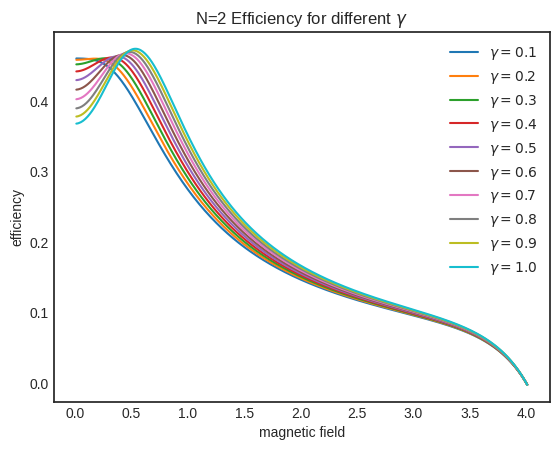

In [ ]:
#anisotropic
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0
x01,x02,x03,x04,x05,x06,x07,x08,x09,x10=[],[],[],[],[],[],[],[],[],[]
y01,y02,y03,y04,y05,y06,y07,y08,y09,y10=[],[],[],[],[],[],[],[],[],[]
b01,b02,b03,b04,b05,b06,b07,b08,b09,b10=[],[],[],[],[],[],[],[],[],[]
a=0.0
d=0.1
while a1<a2:
    a1=a1+0.01
    x01.append(a1)
    x02.append(a1)
    x03.append(a1)
    x04.append(a1)
    x05.append(a1)
    x06.append(a1)
    x07.append(a1)
    x08.append(a1)
    x09.append(a1)
    x10.append(a1)
    d1=0.1
    b01.append(d1)
    eff1 = eff(a1,d1,Tc,Th)
    y01.append(eff1)

    d2=0.2
    b02.append(d2)
    eff2 = eff(a1,d2,Tc,Th)
    y02.append(eff2)

    d3=0.3
    b03.append(d3)
    eff3 = eff(a1,d3,Tc,Th)
    y03.append(eff3)

    d4=0.4
    b04.append(d4)
    eff4 = eff(a1,d4,Tc,Th)
    y04.append(eff4)

    d5=0.5
    b05.append(d5)
    eff5 = eff(a1,d5,Tc,Th)
    y05.append(eff5)

    d6=0.6
    b06.append(d6)
    eff6 = eff(a1,d6,Tc,Th)
    y06.append(eff6)

    d7=0.7
    b07.append(d7)
    eff7 = eff(a1,d7,Tc,Th)
    y07.append(eff7)

    d8=0.8
    b08.append(d8)
    eff8 = eff(a1,d8,Tc,Th)
    y08.append(eff8)

    d9=0.9
    b09.append(d9)
    eff9 = eff(a1,d9,Tc,Th)
    y09.append(eff9)

    d10=1.0
    b10.append(d10)
    eff10 = eff(a1,d10,Tc,Th)
    y10.append(eff10)

plt.figure()
plt.plot(x01, y01, label="$\gamma=0.1$", marker= "",linestyle="-")
plt.plot(x02, y02, label="$\gamma=0.2$", marker= "",linestyle="-")
plt.plot(x03, y03, label="$\gamma=0.3$", marker= "",linestyle="-")
plt.plot(x04, y04, label="$\gamma=0.4$", marker= "",linestyle="-")
plt.plot(x05, y05, label="$\gamma=0.5$", marker= "",linestyle="-")
plt.plot(x06, y06, label="$\gamma=0.6$", marker= "",linestyle="-")
plt.plot(x07, y07, label="$\gamma=0.7$", marker= "",linestyle="-")
plt.plot(x08, y08, label="$\gamma=0.8$", marker= "",linestyle="-")
plt.plot(x09, y09, label="$\gamma=0.9$", marker= "",linestyle="-")
plt.plot(x10, y10, label="$\gamma=1.0$", marker= "",linestyle="-")
plt.xlabel('magnetic field')
plt.ylabel('efficiency')
plt.title("N=2 Efficiency for different $\gamma$")
plt.legend(loc="upper right")
plt.show()


Text(0.5, 1.0, 'N=2')

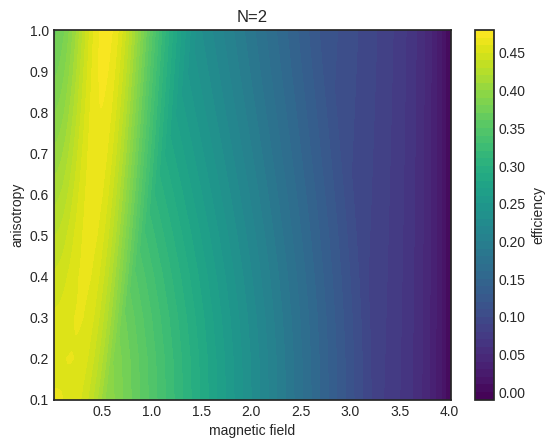

In [ ]:
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0

def eff(a,b,Tc,Th):

    def E_1(b):
        E1 = (-2-(b-1))
        return E1
    def E_2(a,b):
        E2 = (-2- (b-1))/2 - sqrt(4*a*a + (sqrt(6)*(b-1)/4)**2)
        return E2
    def E_3(a,b):
        E3 = ((-2- (b-1))/2 + sqrt(4*a*a + (sqrt(6)*(b-1)/4)**2))
        return E3

    def partition_func(a,b,T):
        Z_an = exp((-1/T)*(E_1(b))) + exp((-1/T)*(E_2(a,b))) + exp((-1/T)*(E_3(a,b)))
        return Z_an

    def entropy_func(a,b,T):
        S_an = -(exp(-E_1(b)/T))/partition_func(a,b,T) * log((exp(-E_1(b)/T))/partition_func(a,b,T)) - (exp(-E_2(a,b)/T)/partition_func(a,b,T)) *log(exp(-E_2(a,b)/T)/partition_func(a,b,T)) - (exp(-E_3(a,b)/T)/partition_func(a,b,T)) *log(exp(-E_3(a,b)/T)/partition_func(a,b,T))
        return S_an

    def internalenergy_func(a,b,T):
        U_an =  ((exp(-E_1(b)/T)/partition_func(a,b,T))*(E_1(b))) + ((exp((-1/T)*(E_2(a,b)))/partition_func(a,b,T)) *(E_2(a,b))) + ((exp((-1/T)*(E_3(a,b)))/partition_func(a,b,T))*(E_3(a,b)))
        return U_an

    def Q_AB(a,b,Tc,Th):
        a1=a
        a2=4
        QAB = Th*(entropy_func(a1,b,Th) - entropy_func(a2,b,Th))
        return QAB
    def Q_BC(a,b,Tc,Th):
        a1=a
        a2=4
        QBC = internalenergy_func(a1,b,Tc) - internalenergy_func(a1,b,Th)
        return QBC
    def Q_CD(a,b,Tc,Th):
        a1=a
        a2=4
        QCD = Tc*(entropy_func(a2,b,Tc) - entropy_func(a1,b,Tc))
        return QCD
    def Q_DA(a,b,Tc,Th):
        a1=a
        a2=4
        QDA = internalenergy_func(a2,b,Th) - internalenergy_func(a2,b,Tc)
        return QDA
    eff= (Q_AB(a,b,Tc,Th) + Q_BC(a,b,Tc,Th) + Q_CD(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))/(Q_AB(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))
    return eff
arrays_x = [x01,x02,x03,x04,x05,x06,x07,x08,x09,x10]
arrays_b = [b01,b02,b03,b04,b05,b06,b07,b08,b09,b10]
arrays_eff= [y01,y02,y03,y04,y05,y06,y07,y08,y09,y10]
x = np.concatenate(arrays_x)
y = np.concatenate(arrays_b)
z = np.concatenate(arrays_eff)
X, Y = np.meshgrid(x, y)
Z = eff(X,Y,0.3,0.6)
plt.contourf(X, Y, Z,50, cmap='viridis')
plt.colorbar(label = "Efficiency")
plt.xlabel('Magnetic field')
plt.ylabel('Anisotropy')
plt.title("N=2")

In [ ]:
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0

def alpha(b):
    alp = -1 - (b-1)/(2*sqrt(2))
    return alp
def beta(b):
    bet = sqrt(6)*(b-1)/4
    return bet
def kappa(b):
    kap = -7/3 - sqrt(7/2)*(sqrt(3) +2)*(b-1)/6
    return kap
def sigma(b):
    sig = sqrt(2)*(b-1)/2
    return sig
def E31(a,b,T):
    E31 = (alpha(b) + kappa(b))/2 - a -(1/2)*sqrt((alpha(b)-4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
    return E31
def E32(a,b,T):
    E32 = (alpha(b) + kappa(b))/2 - a +(1/2)*sqrt((alpha(b)-4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
    return E32
def E33(a,b,T):
    E33 = (alpha(b) + kappa(b))/2 + a -(1/2)*sqrt((alpha(b)+4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
    return E33
def E34(a,b,T):
    E34 = (alpha(b) + kappa(b))/2 + a +(1/2)*sqrt((alpha(b)+4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
    return E34

def partition_func(a,b,T):
  Z_an = exp((-1/T)*E31(a,b,T)) + exp((-1/T)*E32(a,b,T)) + exp((-1/T)*E33(a,b,T)) +exp((-1/T)*E34(a,b,T))
  return Z_an

def entropy_func(a,b,T):
  S_an = -(exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) * log(exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E32(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E32(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E33(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E33(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E34(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E34(a,b,T))/partition_func(a,b,T))
  return S_an

def internalenergy_func(a,b,T):
  U_an =  (exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) * E31(a,b,T) +  (exp((-1/T)*E32(a,b,T))/partition_func(a,b,T)) * E32(a,b,T) +  (exp((-1/T)*E33(a,b,T))/partition_func(a,b,T)) * E33(a,b,T) +  (exp((-1/T)*E34(a,b,T))/partition_func(a,b,T)) * E34(a,b,T)
  return U_an
def Q_AB(a,b,Tc,Th):
    a=a1
    a2=4
    QAB = Th*(entropy_func(a1,b,Th) - entropy_func(a2,b,Th))
    return QAB
def Q_BC(a,b,Tc,Th):
    a=a1
    a2=4
    QBC = internalenergy_func(a1,b,Tc) - internalenergy_func(a1,b,Th)
    return QBC
def Q_CD(a,b,Tc,Th):
    a=a1
    a2=4
    QCD = Tc*(entropy_func(a2,b,Tc) - entropy_func(a1,b,Tc))
    return QCD
def Q_DA(a,b,Tc,Th):
    a=a1
    a2=4
    QDA = internalenergy_func(a2,b,Th) - internalenergy_func(a2,b,Tc)
    return QDA
def eff(a,b,Tc,Th):
    eff= (Q_AB(a,b,Tc,Th) + Q_BC(a,b,Tc,Th) + Q_CD(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))/(Q_AB(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))
    return eff
print(partition_func(1,1,0.3))
print(entropy_func(1,1,0.3))
print(internalenergy_func(1,0.1,0.3))

684433.2758337705
0.321364451679673
-3.769756922762685


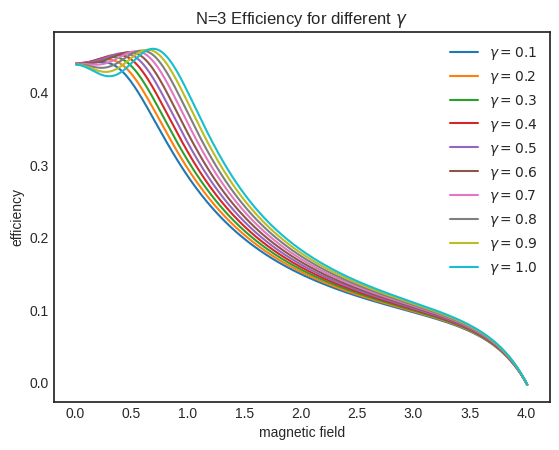

In [ ]:
#anisotropic
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0
x01,x02,x03,x04,x05,x06,x07,x08,x09,x10=[],[],[],[],[],[],[],[],[],[]
y01,y02,y03,y04,y05,y06,y07,y08,y09,y10=[],[],[],[],[],[],[],[],[],[]
b01,b02,b03,b04,b05,b06,b07,b08,b09,b10=[],[],[],[],[],[],[],[],[],[]
a=0.0
d=0.1
while a1<a2:
    a1=a1+0.01
    x01.append(a1)
    x02.append(a1)
    x03.append(a1)
    x04.append(a1)
    x05.append(a1)
    x06.append(a1)
    x07.append(a1)
    x08.append(a1)
    x09.append(a1)
    x10.append(a1)
    d1=0.1
    b01.append(d1)
    eff1 = eff(a1,d1,Tc,Th)
    y01.append(eff1)

    d2=0.2
    b02.append(d2)
    eff2 = eff(a1,d2,Tc,Th)
    y02.append(eff2)

    d3=0.3
    b03.append(d3)
    eff3 = eff(a1,d3,Tc,Th)
    y03.append(eff3)

    d4=0.4
    b04.append(d4)
    eff4 = eff(a1,d4,Tc,Th)
    y04.append(eff4)

    d5=0.5
    b05.append(d5)
    eff5 = eff(a1,d5,Tc,Th)
    y05.append(eff5)

    d6=0.6
    b06.append(d6)
    eff6 = eff(a1,d6,Tc,Th)
    y06.append(eff6)

    d7=0.7
    b07.append(d7)
    eff7 = eff(a1,d7,Tc,Th)
    y07.append(eff7)

    d8=0.8
    b08.append(d8)
    eff8 = eff(a1,d8,Tc,Th)
    y08.append(eff8)

    d9=0.9
    b09.append(d9)
    eff9 = eff(a1,d9,Tc,Th)
    y09.append(eff9)

    d10=1.0
    b10.append(d10)
    eff10 = eff(a1,d10,Tc,Th)
    y10.append(eff10)

plt.figure()
plt.plot(x01, y01, label="$\gamma=0.1$", marker= "",linestyle="-")
plt.plot(x02, y02, label="$\gamma=0.2$", marker= "",linestyle="-")
plt.plot(x03, y03, label="$\gamma=0.3$", marker= "",linestyle="-")
plt.plot(x04, y04, label="$\gamma=0.4$", marker= "",linestyle="-")
plt.plot(x05, y05, label="$\gamma=0.5$", marker= "",linestyle="-")
plt.plot(x06, y06, label="$\gamma=0.6$", marker= "",linestyle="-")
plt.plot(x07, y07, label="$\gamma=0.7$", marker= "",linestyle="-")
plt.plot(x08, y08, label="$\gamma=0.8$", marker= "",linestyle="-")
plt.plot(x09, y09, label="$\gamma=0.9$", marker= "",linestyle="-")
plt.plot(x10, y10, label="$\gamma=1.0$", marker= "",linestyle="-")
plt.xlabel('magnetic field')
plt.ylabel('efficiency')
plt.title("N=3 Efficiency for different $\gamma$")
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'N=3')

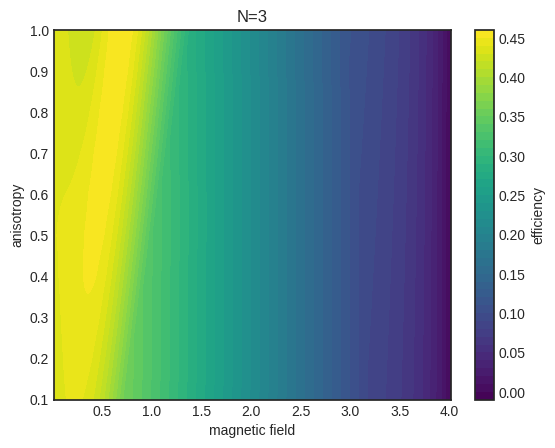

In [ ]:
Th = 0.6
Tc = 0.3
a2 = 4
a1= 0.0

def eff(a,b,Tc,Th):
    def alpha(b):
        alp = -1 - (b-1)/(2*sqrt(2))
        return alp
    def beta(b):
        bet = sqrt(6)*(b-1)/4
        return bet
    def kappa(b):
        kap = -7/3 - sqrt(7/2)*(sqrt(3) +2)*(b-1)/6
        return kap
    def sigma(b):
        sig = sqrt(2)*(b-1)/2
        return sig
    def E31(a,b,T):
        E31 = (alpha(b) + kappa(b))/2 - a -(1/2)*sqrt((alpha(b)-4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
        return E31
    def E32(a,b,T):
        E32 = (alpha(b) + kappa(b))/2 - a +(1/2)*sqrt((alpha(b)-4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
        return E32
    def E33(a,b,T):
        E33 = (alpha(b) + kappa(b))/2 + a -(1/2)*sqrt((alpha(b)+4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
        return E33
    def E34(a,b,T):
        E34 = (alpha(b) + kappa(b))/2 + a +(1/2)*sqrt((alpha(b)+4*a-kappa(b))**2 + 4*beta(b)*sigma(b))
        return E34

    def partition_func(a,b,T):
        Z_an = exp((-1/T)*E31(a,b,T)) + exp((-1/T)*E32(a,b,T)) + exp((-1/T)*E33(a,b,T)) +exp((-1/T)*E34(a,b,T))
        return Z_an

    def entropy_func(a,b,T):
        S_an = -(exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) * log(exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E32(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E32(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E33(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E33(a,b,T))/partition_func(a,b,T)) - exp((-1/T)*E34(a,b,T))/partition_func(a,b,T) * log(exp((-1/T)*E34(a,b,T))/partition_func(a,b,T))
        return S_an

    def internalenergy_func(a,b,T):
        U_an =  (exp((-1/T)*E31(a,b,T))/partition_func(a,b,T)) * E31(a,b,T) +  (exp((-1/T)*E32(a,b,T))/partition_func(a,b,T)) * E32(a,b,T) +  (exp((-1/T)*E33(a,b,T))/partition_func(a,b,T)) * E33(a,b,T) +  (exp((-1/T)*E34(a,b,T))/partition_func(a,b,T)) * E34(a,b,T)
        return U_an
    def Q_AB(a,b,Tc,Th):
        a1=a
        a2=4
        QAB = Th*(entropy_func(a1,b,Th) - entropy_func(a2,b,Th))
        return QAB
    def Q_BC(a,b,Tc,Th):
        a1=a
        a2=4
        QBC = internalenergy_func(a1,b,Tc) - internalenergy_func(a1,b,Th)
        return QBC
    def Q_CD(a,b,Tc,Th):
        a1=a
        a2=4
        QCD = Tc*(entropy_func(a2,b,Tc) - entropy_func(a1,b,Tc))
        return QCD
    def Q_DA(a,b,Tc,Th):
        a1=a
        a2=4
        QDA = internalenergy_func(a2,b,Th) - internalenergy_func(a2,b,Tc)
        return QDA
    eff= (Q_AB(a,b,Tc,Th) + Q_BC(a,b,Tc,Th) + Q_CD(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))/(Q_AB(a,b,Tc,Th) + Q_DA(a,b,Tc,Th))
    return eff
arrays_x = [x01,x02,x03,x04,x05,x06,x07,x08,x09,x10]
arrays_b = [b01,b02,b03,b04,b05,b06,b07,b08,b09,b10]
arrays_eff= [y01,y02,y03,y04,y05,y06,y07,y08,y09,y10]
x = np.concatenate(arrays_x)
y = np.concatenate(arrays_b)
z = np.concatenate(arrays_eff)
X, Y = np.meshgrid(x, y)
Z = eff(X,Y,0.3,0.6)
plt.contourf(X, Y, Z,50, cmap='viridis')
plt.colorbar(label = "Efficiency")
plt.xlabel('Magnetic field')
plt.ylabel('Anisotropy')
plt.title("N=3")